# Main Focus of the Notebook: Exploratory Data Analysis and Dropping detected spots which are most likely noise

In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import napari
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('../src/')

from detections_preprocessing import hist_plot, box_whisker_plot

plt.rcParams["font.family"] = ""

In [2]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/spots_c3_all.pkl'
spots_df = pd.read_pickle(path)

In [3]:
spots_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0
1,198.333333,69.0,52.0,-2.0,2.0,2.0,7.0,0
2,207.348417,103.0,123.0,4.0,3.0,2.0,36.0,0
3,185.333333,104.0,244.0,-2.0,4.0,2.0,7.0,0
4,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0


In [4]:
spots_df.shape

(60142, 8)

# Analysing Amplitude 
1. Box and Whisker Plot to find the upper and lower quartiles and caps 
2. Histogram to try and understand the distribution of the amplitude 

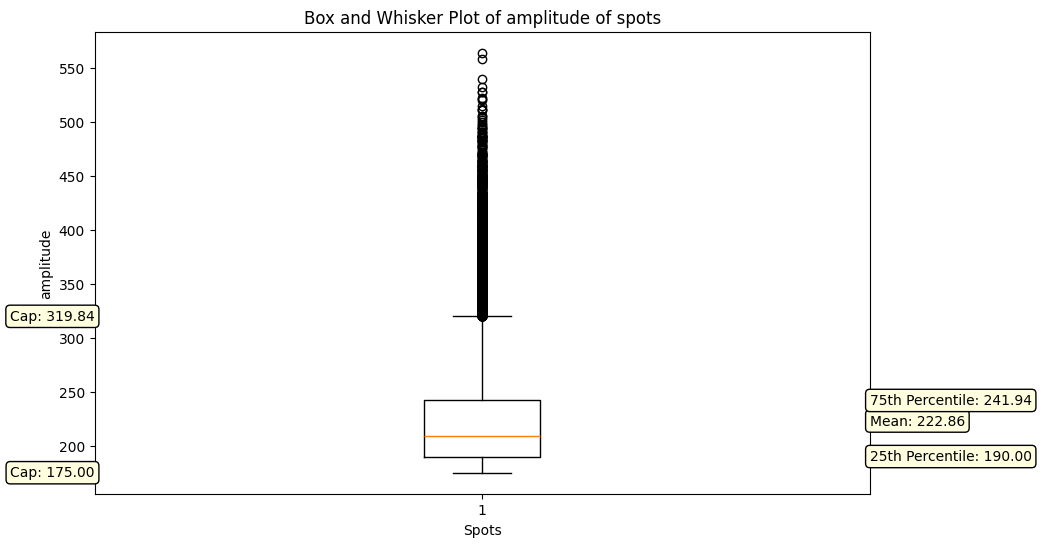

In [5]:
stats = box_whisker_plot(dataframe = spots_df,column_name = 'amplitude')

In [6]:
print(stats.keys())

dict_keys(['lower_whisker', 'upper_whisker', 'mean', 'lower_quantile', 'upper_quantile'])


In [7]:
print(len(spots_df[spots_df['amplitude'] > stats['upper_whisker']]))

2535


**Use the below dataframe for visualisation in napari and determine the final cuttoff**

In [8]:
high_amplitude_df = spots_df[spots_df['amplitude'] > stats['upper_whisker']].sort_values(by = 'amplitude', ascending = False)
high_amplitude_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
4334,564.000000,202.0,229.0,56.0,1.0,1.0,2.0,7
1031,558.000000,223.0,95.0,60.0,1.0,1.0,2.0,1
1114,539.472079,136.0,152.0,72.0,2.0,2.0,2.0,1
25718,532.666667,122.0,177.0,65.0,0.0,2.0,1.0,48
3923,528.000000,198.0,182.0,76.0,2.0,1.0,5.0,6


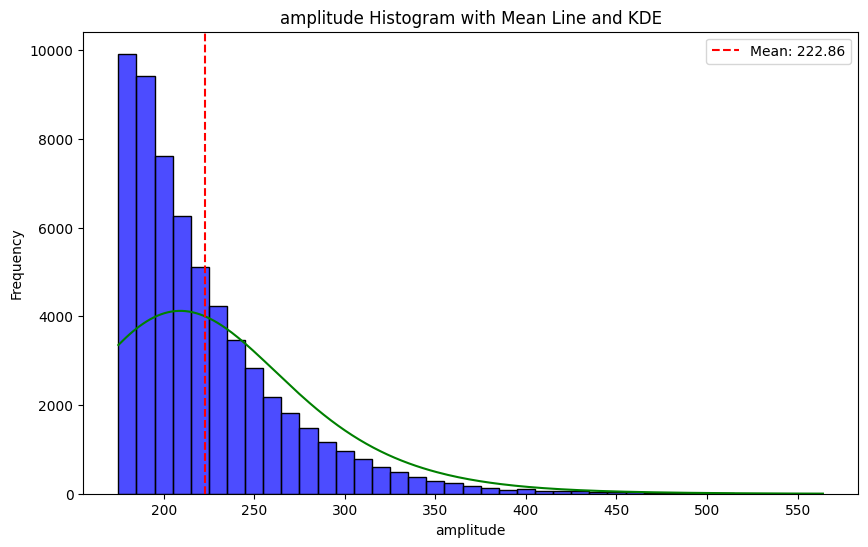

{'max_val': 564, 'min_val': 175, 'bin_size': 10}

In [9]:
hist_plot(dataframe = spots_df, column_name = 'amplitude', bin_size = 10)

# Analysing Std Dev of X
1. Box and Whisker Plot to find the upper and lower quartiles and caps 
2. Histogram to try and understand the distribution of the sigma_x

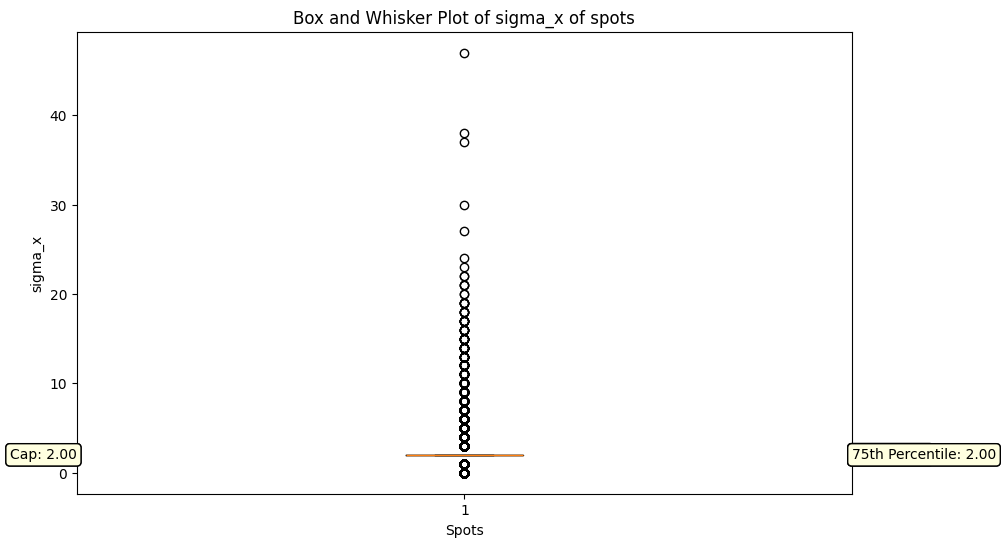

In [10]:
stats_sigma_x = box_whisker_plot(dataframe = spots_df,column_name = 'sigma_x')

In [11]:
print(stats_sigma_x.keys())

dict_keys(['lower_whisker', 'upper_whisker', 'mean', 'lower_quantile', 'upper_quantile'])


In [12]:
print(stats_sigma_x.values())

dict_values([2.0, 2.0, 2.024275880416348, 2.0, 2.0])


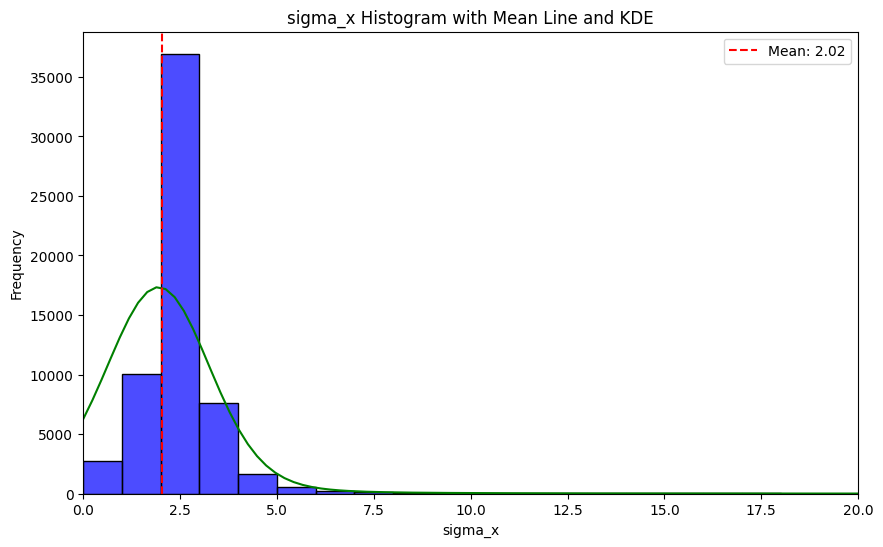

{'max_val': 47, 'min_val': 0, 'bin_size': 1}

In [13]:
hist_plot(dataframe = spots_df, column_name = 'sigma_x', bin_size = 1, custom_xaxis = True, 
          lower_xlimit = 0, upper_xlimit = 20)

In [14]:
high_sigmax_df = spots_df[spots_df['sigma_x'] > 4].sort_values(by = 'sigma_x', ascending = False)
high_sigmax_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
32154,184.009140,195.0,190.0,31.0,47.0,2.0,4.0,62
46749,203.126035,104.0,244.0,35.0,38.0,2.0,3.0,95
14586,196.319373,126.0,29.0,68.0,37.0,2.0,11.0,26
30112,226.381945,112.0,146.0,2.0,30.0,1.0,3.0,58
50301,199.616651,234.0,33.0,65.0,27.0,2.0,4.0,103


In [15]:
high_sigmax_df.shape

(1227, 8)

In [16]:
low_sigmax_df = spots_df[spots_df['sigma_x'] == 0].sort_values(by = 'sigma_x', ascending = False)
low_sigmax_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
16,208.666667,10.0,12.0,1.0,0.0,2.0,1.0,0
37844,197.333333,121.0,203.0,64.0,0.0,7.0,1.0,74
37609,202.333333,48.0,61.0,22.0,0.0,1.0,1.0,74
37741,277.666667,95.0,22.0,49.0,0.0,1.0,1.0,74
37746,192.024639,96.0,102.0,49.0,0.0,1.0,2.0,74


In [17]:
low_sigmax_df.shape

(2704, 8)

# NOTES FOR SIGMA_X
# Two cases for sigma_x need to be tackled
1. **Spots with standard deviation of 0**
2. **Spots with standard deviation of more than 4**

# Analysing Std Dev of Y
1. Box and Whisker Plot to find the upper and lower quartiles and caps 
2. Histogram to try and understand the distribution of the sigma_y

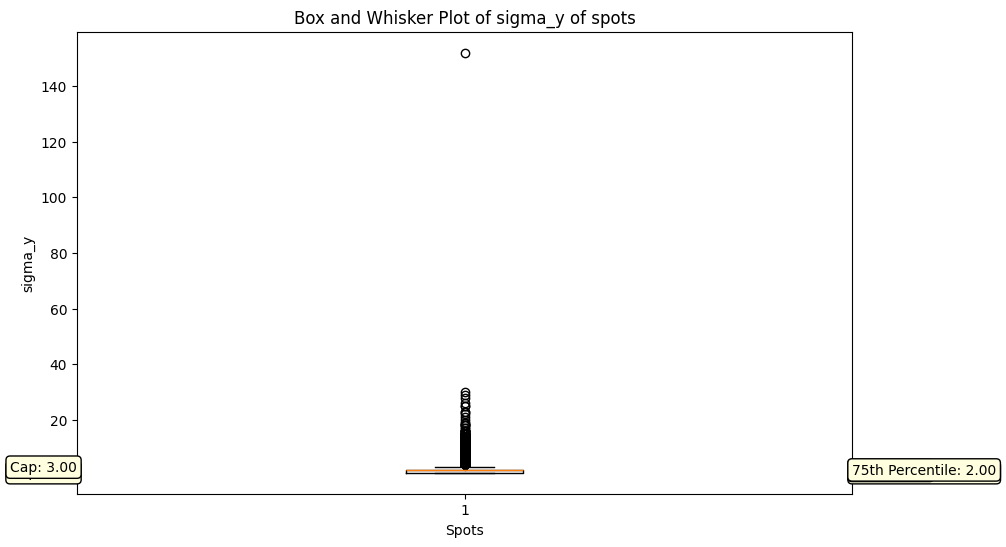

In [18]:
stats_sigma_y = box_whisker_plot(dataframe = spots_df,column_name = 'sigma_y')

In [19]:
print(stats_sigma_y)

{'lower_whisker': 1.0, 'upper_whisker': 3.0, 'mean': 1.8290711981643444, 'lower_quantile': 1.0, 'upper_quantile': 2.0}


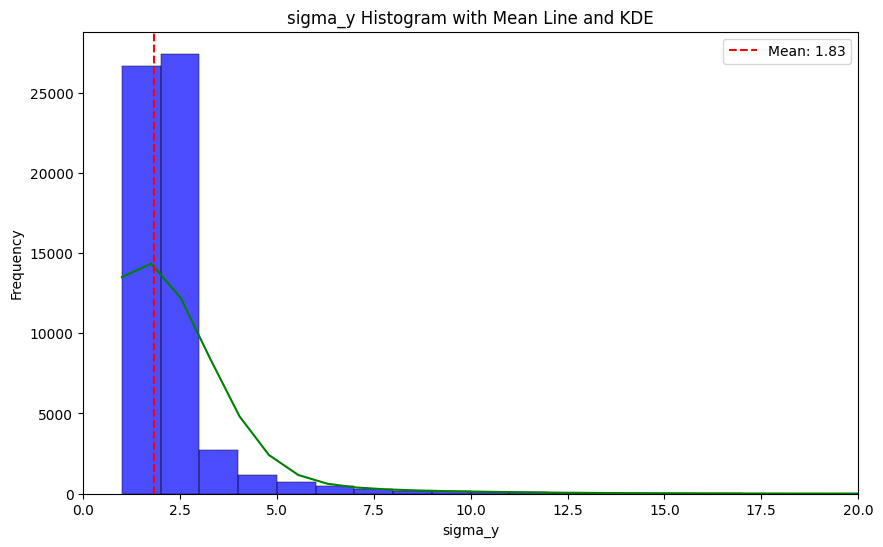

{'max_val': 152, 'min_val': 1, 'bin_size': 1}

In [20]:
hist_plot(dataframe = spots_df, column_name = 'sigma_y', bin_size = 1, custom_xaxis = True, 
          lower_xlimit = 0, upper_xlimit = 20)

In [21]:
high_sigmay_df = spots_df[spots_df['sigma_y']>4].sort_values(by='sigma_y', ascending = False)
high_sigmay_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
7005,197.333333,81.0,56.0,40.0,0.0,152.0,2.0,12
58148,190.632666,122.0,199.0,32.0,2.0,30.0,4.0,124
11471,296.000000,231.0,149.0,70.0,2.0,29.0,4.0,20
21266,180.333333,117.0,76.0,62.0,0.0,28.0,1.0,39
140,221.333333,29.0,28.0,10.0,0.0,26.0,2.0,0


In [22]:
high_sigmay_df.shape

(2142, 8)

# Analysing Std Dev of Z
1. Box and Whisker Plot to find the upper and lower quartiles and caps 
2. Histogram to try and understand the distribution of the sigma_z

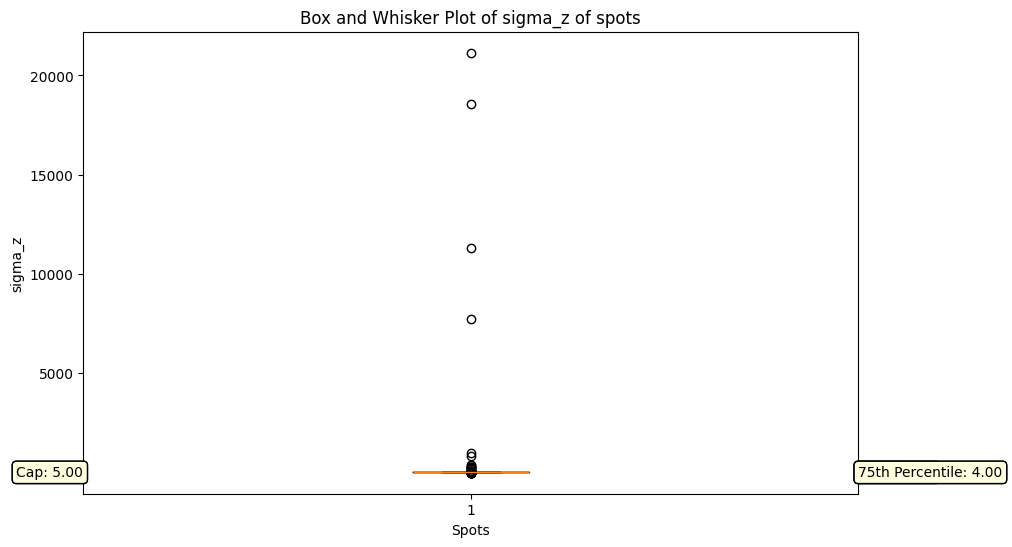

In [23]:
stats_sigma_z = box_whisker_plot(dataframe = spots_df,column_name = 'sigma_z')

In [24]:
print(stats_sigma_z)

{'lower_whisker': 2.0, 'upper_whisker': 5.0, 'mean': 4.757756642612484, 'lower_quantile': 3.0, 'upper_quantile': 4.0}


In [25]:
print(len(spots_df[spots_df['sigma_z'] > 6]))

5650


In [26]:
high_sigmaz_df = spots_df[spots_df['sigma_z'] > 6]

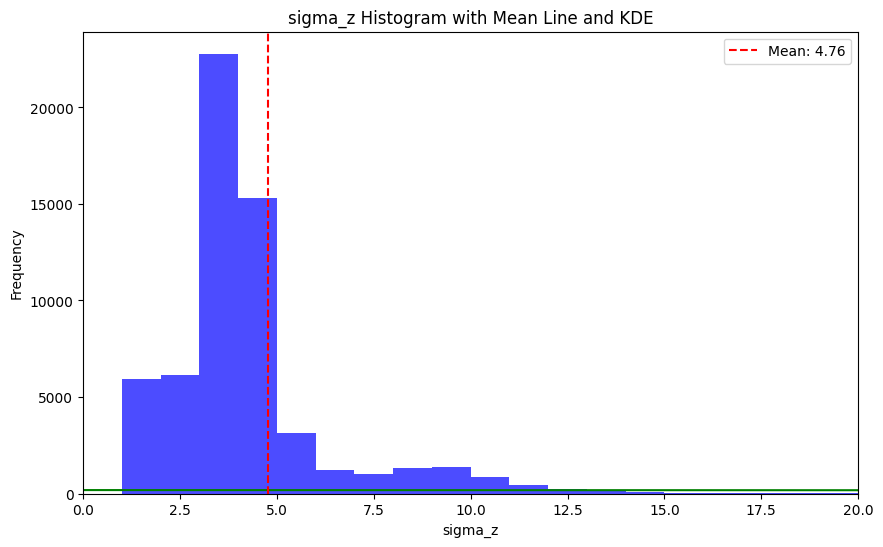

{'max_val': 21142, 'min_val': -13, 'bin_size': 1}

In [27]:
hist_plot(dataframe = spots_df, column_name = 'sigma_z', bin_size = 1,custom_xaxis = True, 
          lower_xlimit = 0, upper_xlimit = 20)

In [28]:
spots_df['sigma_z'].describe()

count    60142.000000
mean         4.757757
std        127.680828
min        -13.000000
25%          3.000000
50%          3.000000
75%          4.000000
max      21142.000000
Name: sigma_z, dtype: float64

In [29]:
spots_df['sigma_y'].describe()

count    60142.000000
mean         1.829071
std          1.467726
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        152.000000
Name: sigma_y, dtype: float64

In [30]:
spots_df['sigma_x'].describe()

count    60142.000000
mean         2.024276
std          1.152124
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         47.000000
Name: sigma_x, dtype: float64

# NAPARI VISUALISATION

# HIGH AMPLITUDE POINTS VISUALISATION

In [31]:
# Create a napari viewer
viewer = napari.Viewer()

# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel3_complete.tif'

# Load the TIFF file using skimage
raw_image_3 = io.imread(file_path)

# Add the 4D stack to the viewer
layer_raw = viewer.add_image(raw_image_3)

# Add Bounding Box
layer_raw.bounding_box.visible = True

In [32]:
points_layer = viewer.add_points(high_amplitude_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'High Amplitude Points', face_color = 'white', symbol = 'ring')

In [33]:
high_amplitude_df.iloc[185:195]

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
271,433.305421,197.0,218.0,36.0,2.0,2.0,3.0,0
8234,433.000000,237.0,62.0,57.0,2.0,1.0,2.0,14
45220,433.000000,124.0,176.0,65.0,1.0,1.0,2.0,91
2791,433.000000,135.0,153.0,71.0,2.0,2.0,4.0,4
18215,432.333333,122.0,175.0,65.0,1.0,1.0,2.0,33
38728,432.202747,127.0,177.0,65.0,9.0,2.0,2.0,76
31484,432.200323,208.0,182.0,75.0,2.0,2.0,5.0,60
12549,432.000000,135.0,153.0,70.0,2.0,2.0,3.0,22
10403,431.933123,124.0,177.0,66.0,0.0,2.0,1.0,18
15694,431.757733,204.0,182.0,75.0,4.0,3.0,5.0,28


In [34]:
high_amplitude_df[high_amplitude_df['frame'] == 115]

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
55055,388.000000,253.0,151.0,70.0,3.0,1.0,3.0,115
55020,378.333333,122.0,175.0,65.0,0.0,1.0,1.0,115
55071,358.333333,206.0,186.0,72.0,2.0,1.0,3.0,115
54798,346.000000,122.0,201.0,14.0,2.0,1.0,3.0,115
55029,345.000000,137.0,153.0,68.0,1.0,1.0,2.0,115
55046,331.474447,263.0,149.0,71.0,2.0,2.0,2.0,115
55085,324.453822,195.0,190.0,73.0,3.0,2.0,3.0,115


One way of accessing points data from napari is finding the point on napari and then accessing its coords by 
getting that specific row from numpy array, for example to access point 1014 do the following. 
coords = points_layer.data
coords[1014]

In [35]:
high_amplitude_df.iloc[1034]

amplitude    357.936267
mu_x         179.000000
mu_y         193.000000
mu_z          53.000000
sigma_x        2.000000
sigma_y        1.000000
sigma_z        3.000000
frame          0.000000
Name: 394, dtype: float64

In [36]:
#coords = points_layer.data
#coords[184]

In [37]:
high_amplitude_df['amplitude'].min()

319.8917667125093

## High Sigma X points analysis in Napari

In [38]:
points_layer = viewer.add_points(high_sigmax_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'High Sigma X points', face_color = 'white', symbol = 'ring')

In [39]:
high_sigmax_df.iloc[972]

amplitude    454.068257
mu_x         206.000000
mu_y         179.000000
mu_z          75.000000
sigma_x        5.000000
sigma_y        3.000000
sigma_z        4.000000
frame          0.000000
Name: 577, dtype: float64

In [40]:
points_layer = viewer.add_points(low_sigmax_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'Low Sigma X points', face_color = 'white', symbol = 'ring')

In [41]:
low_sigmax_df.iloc[1906]

amplitude    295.666667
mu_x         114.000000
mu_y         208.000000
mu_z          60.000000
sigma_x        0.000000
sigma_y        3.000000
sigma_z        1.000000
frame         10.000000
Name: 6048, dtype: float64

# Testing for Sigma y in napari

In [42]:
points_layer = viewer.add_points(high_sigmay_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'High Sigma Y points', face_color = 'white', symbol = 'ring')

# Testing for Sigma z in napari

In [43]:
points_layer = viewer.add_points(high_sigmaz_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'High Sigma Z points', face_color = 'white', symbol = 'ring')

In [44]:
high_sigmaz_df.iloc[662]

amplitude    329.0
mu_x         235.0
mu_y         169.0
mu_z          76.0
sigma_x        4.0
sigma_y        2.0
sigma_z       10.0
frame         12.0
Name: 7246, dtype: float64

# DROPPING VALUES OUTSIDE OF CUTOFF LIMITS
## Selected Cut off Values are 
1. Amplitude is 350 
2. Sigma x upper bound is 4
3. Sigma y upper bound is 4
4. Sigma z upper bound is 6

In [45]:
# Define the conditions
condition_1 = spots_df['amplitude'] <= 350
condition_2 = spots_df['sigma_x'] <= 4
condition_3 = spots_df['sigma_y'] <= 4
condition_4 = spots_df['sigma_z'] <= 6
condition_5 = spots_df['mu_z'] >= 0
condition_6 = spots_df['mu_z'] <= 74


# Combine the conditions using logical AND (&)
cleaned_spots_df = spots_df[condition_1 & condition_2 & condition_3 & condition_4 & condition_5 & condition_6]

# Display the resulting DataFrame
cleaned_spots_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0
4,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0
5,231.007679,40.0,141.0,1.0,2.0,2.0,2.0,0
6,185.152538,40.0,58.0,1.0,2.0,1.0,3.0,0
7,202.000000,46.0,73.0,1.0,2.0,2.0,3.0,0


In [46]:
dropped_spots = spots_df[~(condition_1 & condition_2 & condition_3 & condition_4 & condition_5 & condition_6)]

In [47]:
cleaned_spots_df['mu_z'].min()

0.0

In [48]:
cleaned_spots_df.shape

(49867, 8)

# Final Graphs

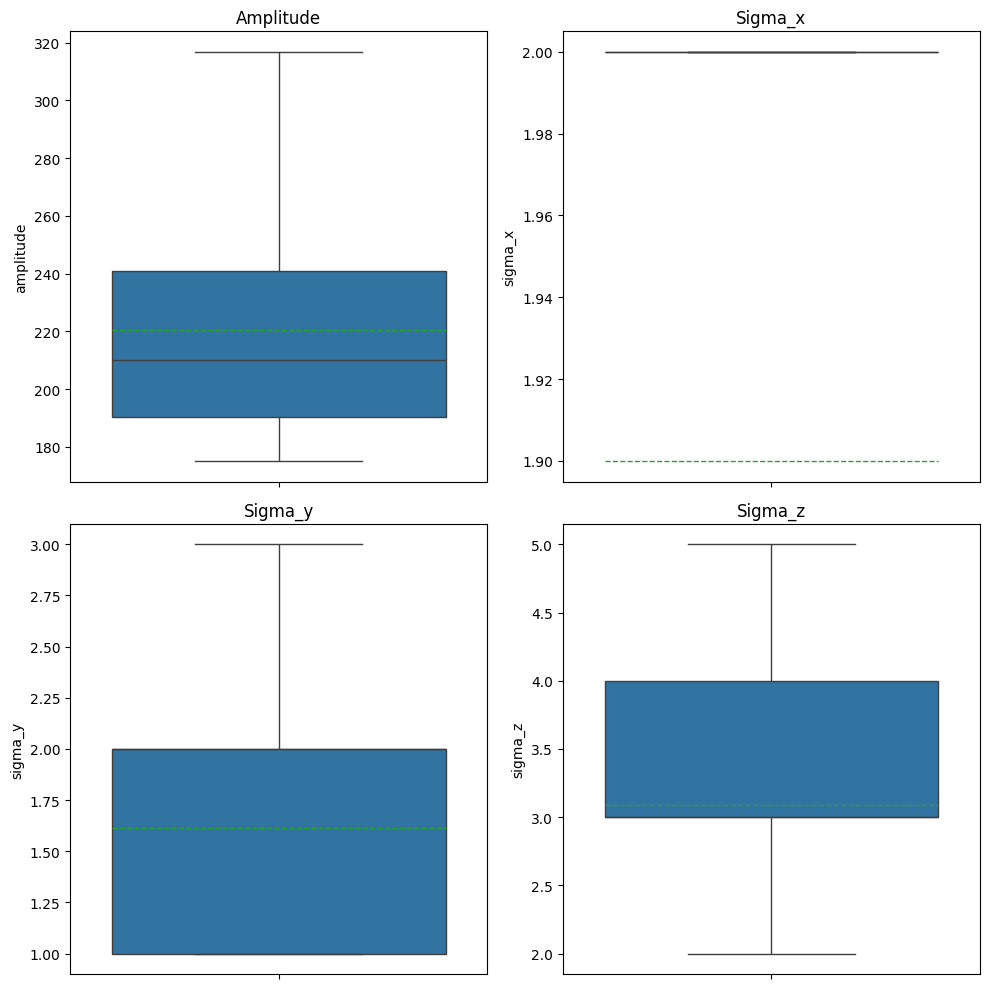

In [49]:
# Set up subplots as a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Box plot for Amplitude
sns.boxplot(y='amplitude', data=cleaned_spots_df, ax=axes[0], showmeans=True, meanline=True, showfliers=False)
axes[0].set_title('Amplitude')

# Box plot for sigma_x
sns.boxplot(y='sigma_x', data=cleaned_spots_df, ax=axes[1], showmeans=True, meanline=True, showfliers=False)
axes[1].set_title('Sigma_x')

# Box plot for sigma_y
sns.boxplot(y='sigma_y', data=cleaned_spots_df, ax=axes[2], showmeans=True, meanline=True, showfliers=False)
axes[2].set_title('Sigma_y')

# Box plot for sigma_z
sns.boxplot(y='sigma_z', data=cleaned_spots_df, ax=axes[3], showmeans=True, meanline=True, showfliers=False)
axes[3].set_title('Sigma_z')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


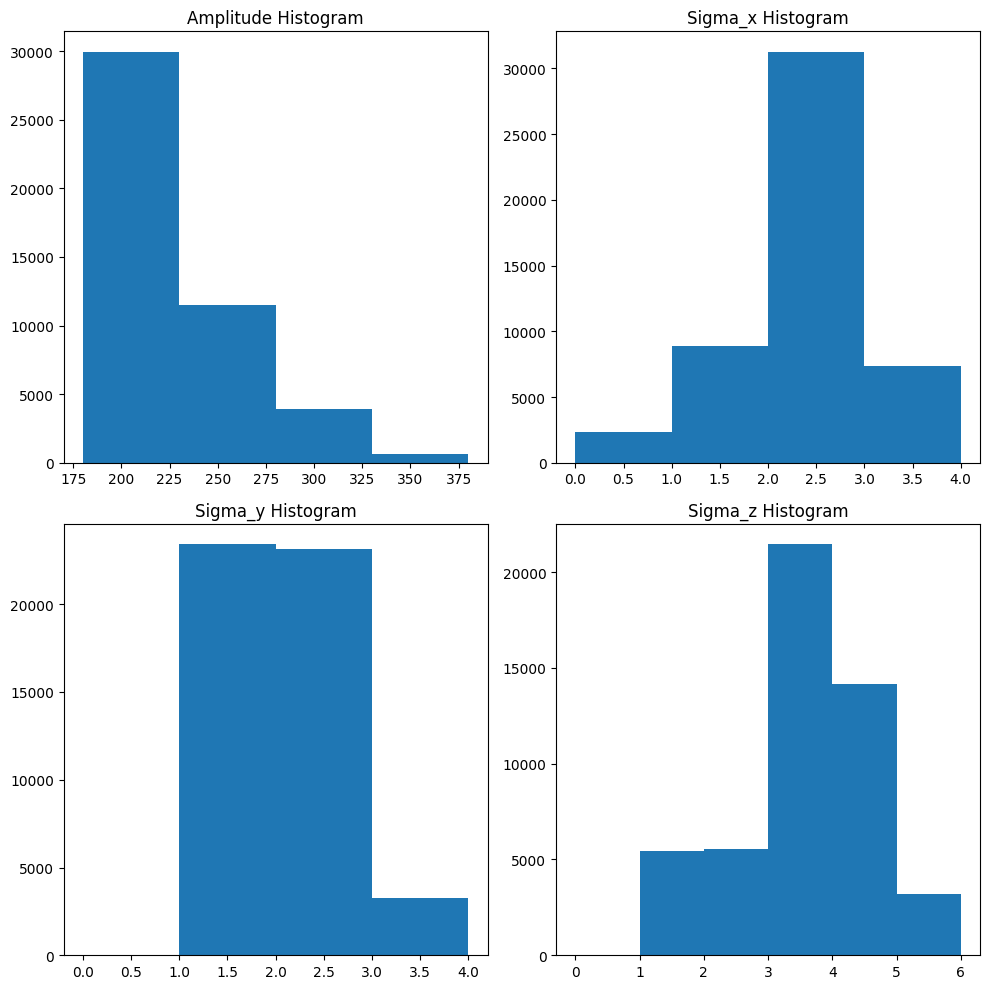

In [50]:
# Assuming cleaned_spots_df is your DataFrame with columns 'Amplitude', 'sigma_x', 'sigma_y', 'sigma_z'

# Set up subplots as a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Histogram for Amplitude with bins of size 50 starting from 180
axes[0].hist(cleaned_spots_df['amplitude'].dropna(), bins=range(180, int(cleaned_spots_df['amplitude'].max()) + 50, 50))
axes[0].set_title('Amplitude Histogram')

# Histogram for sigma_x with bins of size 1 starting from 0
axes[1].hist(cleaned_spots_df['sigma_x'].dropna(), bins=range(0, int(cleaned_spots_df['sigma_x'].max()) + 1, 1))
axes[1].set_title('Sigma_x Histogram')

# Histogram for sigma_y with bins of size 1 starting from 0
axes[2].hist(cleaned_spots_df['sigma_y'].dropna(), bins=range(0, int(cleaned_spots_df['sigma_y'].max()) + 1, 1))
axes[2].set_title('Sigma_y Histogram')

# Histogram for sigma_z with bins of size 1 starting from 0
axes[3].hist(cleaned_spots_df['sigma_z'].dropna(), bins=range(0, int(cleaned_spots_df['sigma_z'].max()) + 1, 1))
axes[3].set_title('Sigma_z Histogram')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


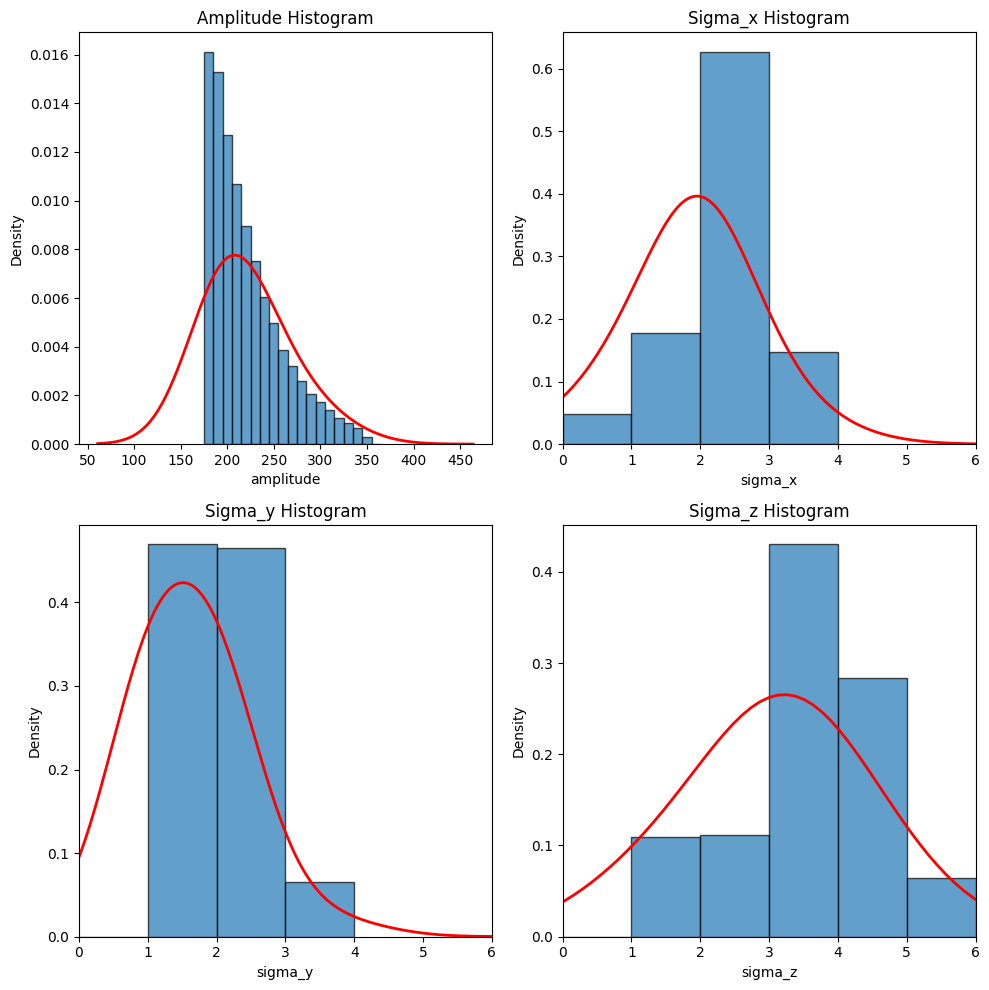

In [51]:
# Set up subplots as a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Histogram for Amplitude with bins of size 50 starting from 180
ax = axes[0].hist(cleaned_spots_df['amplitude'], bins=range(175,375,10), edgecolor='black', density = True,alpha=0.7)
sns.kdeplot(cleaned_spots_df['amplitude'], ax=axes[0], color='red', linewidth=2, bw_method=1)
axes[0].set_title('Amplitude Histogram')

# Histogram for sigma_x with bins of size 1 starting from 0
axes[1].hist(cleaned_spots_df['sigma_x'], bins=range(0, int(cleaned_spots_df['sigma_x'].max()) + 1, 1), 
              density = True, edgecolor='black', alpha=0.7)
sns.kdeplot(cleaned_spots_df['sigma_x'], ax=axes[1], color='red', linewidth=2, bw_method=1)
axes[1].set_title('Sigma_x Histogram')

# Histogram for sigma_y with bins of size 1 starting from 0
axes[2].hist(cleaned_spots_df['sigma_y'], bins=range(0, int(cleaned_spots_df['sigma_y'].max()) + 1, 1), 
             density=True, edgecolor='black', alpha=0.7)
sns.kdeplot(cleaned_spots_df['sigma_y'], ax=axes[2], color='red', linewidth=2, bw_method=1)
axes[2].set_title('Sigma_y Histogram')

# Histogram for sigma_z with bins of size 1 starting from 0
axes[3].hist(cleaned_spots_df['sigma_z'], bins=range(0, int(cleaned_spots_df['sigma_z'].max()) + 1, 1), 
             density=True, edgecolor='black', alpha=0.7)
sns.kdeplot(cleaned_spots_df['sigma_z'], ax=axes[3], color='red', linewidth=2, bw_method=1)
axes[3].set_title('Sigma_z Histogram')

# Set x-axis limit for sigma_z KDE plot
axes[1].set_xlim(0, cleaned_spots_df['sigma_z'].max())
axes[2].set_xlim(0, cleaned_spots_df['sigma_z'].max())
axes[3].set_xlim(0, cleaned_spots_df['sigma_z'].max())

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [53]:
output_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/cleaned_spots_intensities_c3_all.pkl'
# Save the DataFrame to a Pickle file
cleaned_spots_df.to_pickle(output_path)